# LAB 2
- Edwin Montenegro
- Galo Travez

In [3]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Ajustar configuraciones para mejor visualización
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_colwidth', None) # Muestra el contenido completo de cada celda
pd.set_option('display.width', 1000)        # Ancho de la visualización de la consola

# Especifica el nombre del archivo TSV
tsv_file = '/content/drive/MyDrive/TALLERES NLP /train.tsv'
# Cargar el archivo TSV en un DataFrame de pandas
df = pd.read_csv(tsv_file, sep='\t')


In [5]:
from tabulate import tabulate

# Mostrar las primeras filas con tabulate
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+------------+--------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|    |   PhraseId |   SentenceId | Phrase                                                                                                                                                                                       |   Sentiment |
|----+------------+--------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------|
|  0 |          1 |            1 | A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . |           1 |
|  1 |          2 |            1 | A ser

In [6]:
# mostrar la extructura y dimensiones del DataFrame\

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None
(156060, 4)


Distribución de las etiquetas:
Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


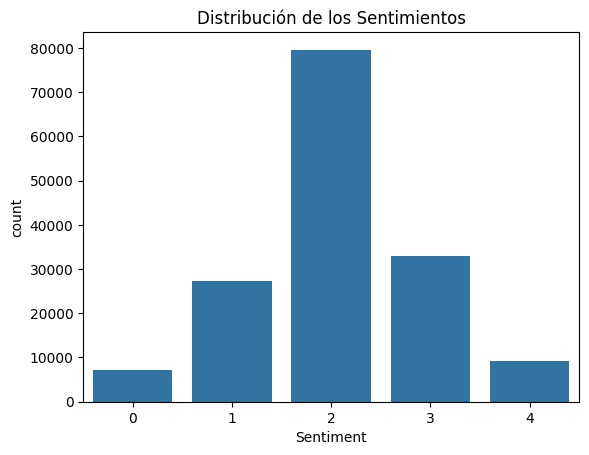

In [7]:
# Mostrar la distribución de las etiquetas
print("Distribución de las etiquetas:")
print(df['Sentiment'].value_counts())

# Visualización de la distribución
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df)
plt.title('Distribución de los Sentimientos')
plt.show()

In [8]:
# Verificar si hay valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64


In [9]:
# Análisis de longitud de las frases
df['TextLength'] = df['Phrase'].apply(lambda x: len(x.split()))
print("Longitud promedio de las frases por sentimiento:")
print(df.groupby('Sentiment')['TextLength'].mean())

Longitud promedio de las frases por sentimiento:
Sentiment
0    12.105345
1     9.112016
2     5.194617
3     8.446594
4    10.701390
Name: TextLength, dtype: float64


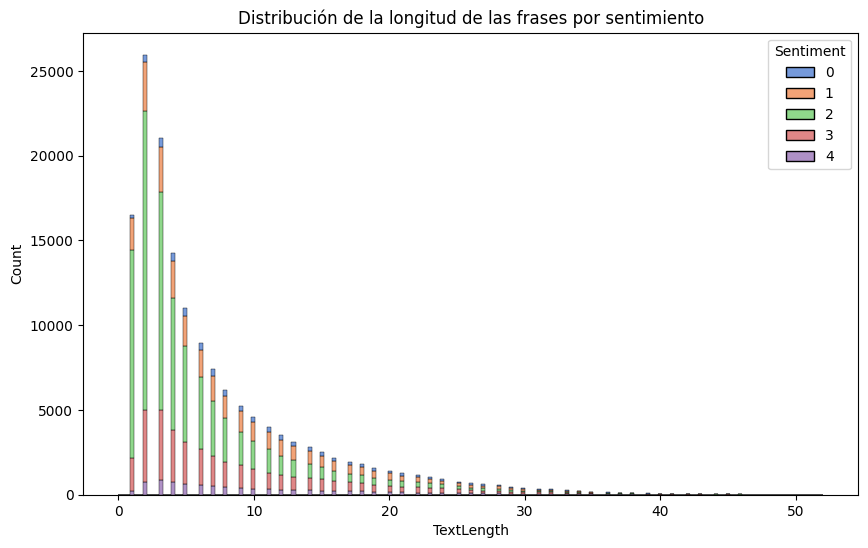

In [10]:
# Visualización de la longitud de las frases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TextLength', hue='Sentiment', multiple='stack', palette='muted')
plt.title('Distribución de la longitud de las frases por sentimiento')
plt.show()

## Análisis de las palabras más comunes por sentimiento

In [11]:

from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def plot_common_words(sentiment, n=20):
    # Filtrar por sentimiento
    phrases = df[df['Sentiment'] == sentiment]['Phrase']

    # Contador de palabras
    word_count = Counter()

    for phrase in phrases:
        words = phrase.split()
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
        word_count.update(filtered_words)

    common_words = word_count.most_common(n)

    print(f"Palabras más comunes para Sentimiento {sentiment}:")
    print(common_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mostrar palabras comunes para cada sentimiento
for sentiment in df['Sentiment'].unique():
    plot_common_words(sentiment)

Palabras más comunes para Sentimiento 1:
[(',', 8847), ('.', 4432), ("'s", 3506), ("n't", 1520), ('movie', 1379), ('film', 1271), ('like', 913), ('--', 785), ('one', 720), ("'", 619), ('much', 594), ('story', 528), ('-rrb-', 498), ('little', 490), ('`', 476), ('...', 457), ('characters', 455), ('-lrb-', 452), ('bad', 427), ('``', 410)]
Palabras más comunes para Sentimiento 2:
[(',', 13141), ("'s", 7001), ('.', 4114), ('film', 2158), ('movie', 1894), ("'", 1349), ('one', 1283), ("n't", 1281), ('-rrb-', 1112), ('like', 1110), ('--', 1029), ('story', 942), ('``', 890), ('-lrb-', 878), ("''", 873), ('`', 818), ('much', 695), ('time', 681), ('life', 647), ('characters', 614)]
Palabras más comunes para Sentimiento 3:
[(',', 11417), ('.', 4766), ("'s", 3999), ('film', 1844), ('movie', 1296), ('good', 859), ('--', 832), ('one', 823), ('story', 661), ('funny', 629), ("n't", 614), ("'", 581), ('like', 578), ('-rrb-', 551), ('-lrb-', 512), ('characters', 497), ('love', 491), ('...', 478), ('comed

In [21]:
from collections import Counter
import pandas as pd
from tabulate import tabulate

# Seleccionar solo las primeras 15 frases del DataFrame original
df_subset = df.head(15)

# Concatenar todas las frases en un solo texto
all_phrases = ' '.join(df_subset['Phrase'])

# Crear una lista de todas las palabras
words = all_phrases.split()

# Contar la frecuencia de cada palabra en el corpus
word_counts = Counter(words)

# Obtener las 25 palabras más comunes
most_common_words = [word for word, _ in word_counts.most_common(25)]

print("Las 25 palabras más frecuentes son:")
print(most_common_words)


Las 25 palabras más frecuentes son:
['the', 'adage', 'of', 'demonstrating', 'is', 'good', 'for', 'escapades', 'that', 'what', 'goose', 'A', 'series', 'which', 'also', 'gander', ',', 'some', 'occasionally', 'amuses', 'but', 'none', 'amounts', 'to', 'much']


In [22]:
# Inicializar un diccionario para almacenar las frecuencias de palabras
corpus_freq = {}

# Iterar sobre las primeras 15 frases y construir el diccionario de frecuencias
for i, phrase in enumerate(df_subset['Phrase']):
    # Inicializar un contador de frecuencias para la frase actual
    word_freq = dict.fromkeys(most_common_words, 0)

    # Dividir la frase en palabras
    words_in_phrase = phrase.split()

    # Contar las palabras en la frase
    for word in words_in_phrase:
        if word in word_freq:
            word_freq[word] += 1

    # Almacenar el contador en el diccionario del corpus
    corpus_freq[f'sent{i}'] = word_freq

# Crear un DataFrame desde el diccionario del corpus
df_word_freq = pd.DataFrame.from_records(corpus_freq).fillna(0).astype(int).T

# Usar tabulate para imprimir de forma más legible
print(tabulate(df_word_freq, headers='keys', tablefmt='psql'))

+--------+-------+---------+------+-----------------+------+--------+-------+-------------+--------+--------+---------+-----+----------+---------+--------+----------+-----+--------+----------------+----------+-------+--------+-----------+------+--------+
|        |   the |   adage |   of |   demonstrating |   is |   good |   for |   escapades |   that |   what |   goose |   A |   series |   which |   also |   gander |   , |   some |   occasionally |   amuses |   but |   none |   amounts |   to |   much |
|--------+-------+---------+------+-----------------+------+--------+-------+-------------+--------+--------+---------+-----+----------+---------+--------+----------+-----+--------+----------------+----------+-------+--------+-----------+------+--------|
| sent0  |     3 |       1 |    4 |               1 |    2 |      2 |     2 |           1 |      1 |      1 |       1 |   1 |        1 |       2 |      1 |        1 |   1 |      1 |              1 |        1 |     1 |      1 |         

# Análisis de N-gramas (bi-gramas) por sentimiento

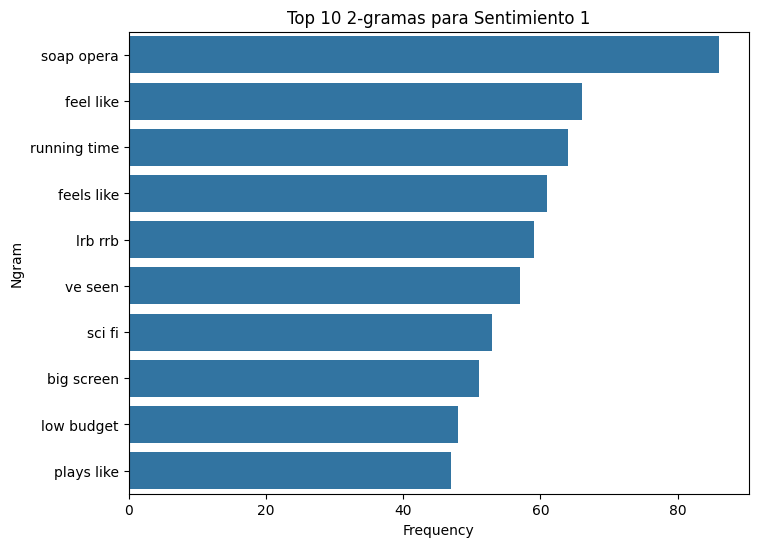

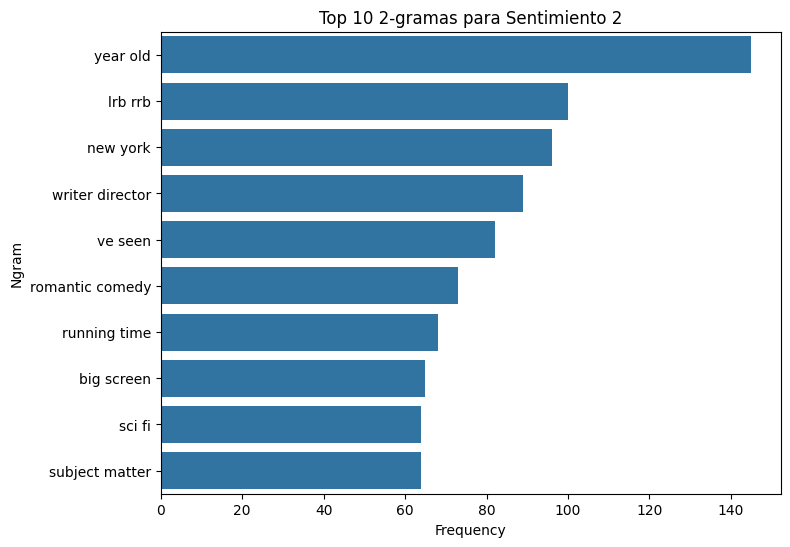

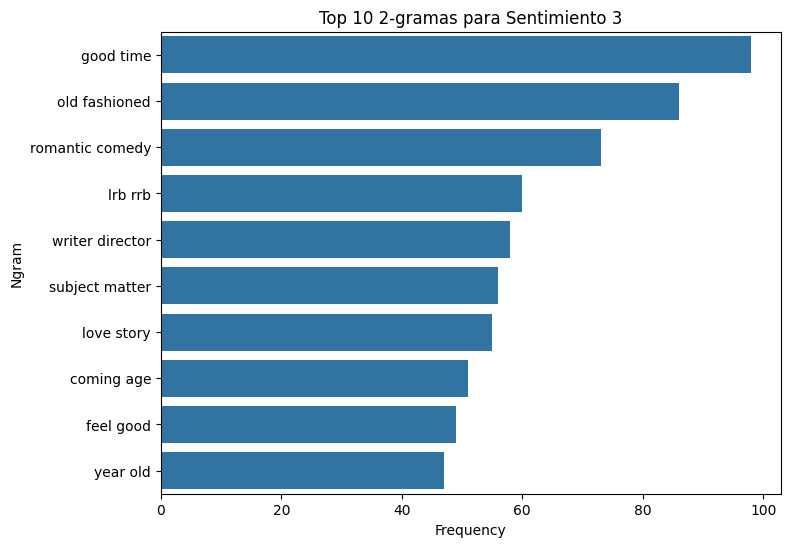

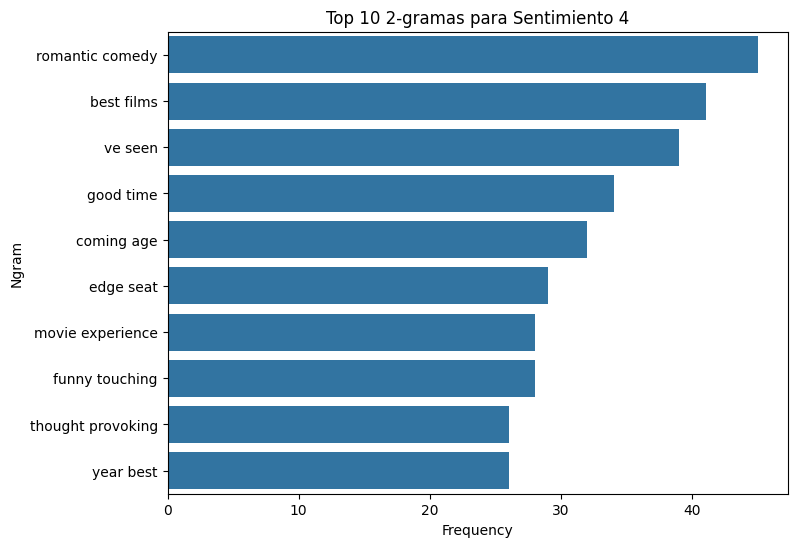

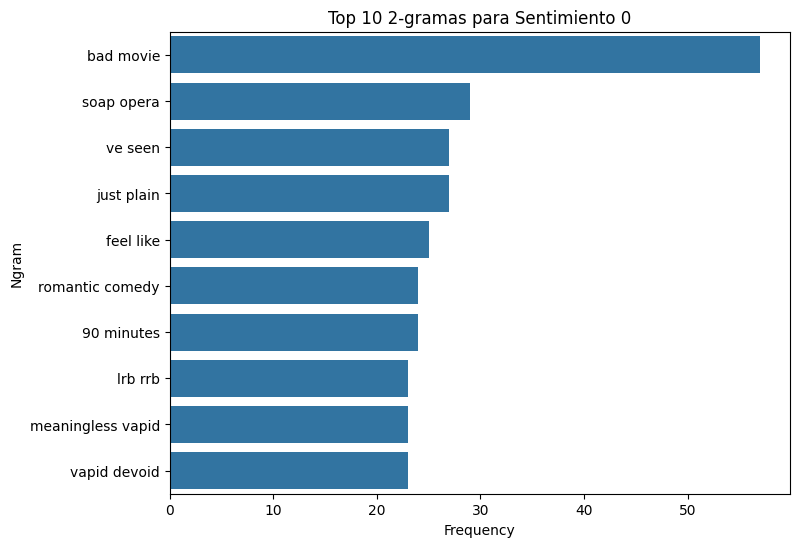

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(sentiment, n=2, top_k=10):
    phrases = df[df['Sentiment'] == sentiment]['Phrase']
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(phrases)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(ngram, ngrams_sum[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_k]

    ngram_df = pd.DataFrame(ngrams_freq, columns=['Ngram', 'Frequency'])

    plt.figure(figsize=(8, 6))
    sns.barplot(data=ngram_df, x='Frequency', y='Ngram')
    plt.title(f'Top {top_k} {n}-gramas para Sentimiento {sentiment}')
    plt.show()

# Mostrar bi-gramas comunes para cada sentimiento
for sentiment in df['Sentiment'].unique():
    plot_top_ngrams(sentiment, n=2, top_k=10)

In [12]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Función para tokenizar una frase utilizando nltk
def tokenize_phrase_nltk(phrase):
    return word_tokenize(phrase)

# Aplicar la tokenización a todas las frases del dataset
df['Tokens'] = df['Phrase'].apply(tokenize_phrase_nltk)

# Mostrar algunas frases tokenizadas
print(df[['Phrase', 'Tokens']].head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                                                                                                                                                         Phrase                                                                                                                                                                                                                              Tokens
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  [A, series, of, escapades, demonstrating, the, adage, that, what, is, good, for, the, goose, is, also, good, for, the, gander, ,, some, of, which, occasionally, amuses, but, none, of, which, amounts, to, much, of, a, story, .]
1                                                                                                                 A series of escapades demonstrating the adage 

 ## Eliminar Stop Words

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Lista de palabras vacías en inglés
stop_words = set(stopwords.words('english'))

# Función para eliminar palabras vacías
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Aplicar eliminación de palabras vacías
df['Tokens_no_stopwords'] = df['Tokens'].apply(remove_stopwords)

# Mostrar algunas filas después de eliminar las stopwords
print(df[['Phrase', 'Tokens_no_stopwords']].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                                                                                                                                                         Phrase                                                                                                                 Tokens_no_stopwords
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  [series, escapades, demonstrating, adage, good, goose, also, good, gander, ,, occasionally, amuses, none, amounts, much, story, .]
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose                                                                              [series, escapades, demonstrating, adage, good, goose]
2                           

## Case Folding

In [14]:
# Función para convertir tokens a minúsculas
def case_folding(tokens):
    return [token.lower() for token in tokens]

# Aplicar case folding
df['Tokens_lower'] = df['Tokens_no_stopwords'].apply(case_folding)

# Mostrar algunas filas después de convertir a minúsculas
print(df[['Phrase', 'Tokens_lower']].head(10))


                                                                                                                                                                                         Phrase                                                                                                                        Tokens_lower
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  [series, escapades, demonstrating, adage, good, goose, also, good, gander, ,, occasionally, amuses, none, amounts, much, story, .]
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose                                                                              [series, escapades, demonstrating, adage, good, goose]
2                           

## Stemming

In [15]:
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()

# Función para aplicar stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Aplicar stemming
df['Tokens_stemmed'] = df['Tokens_lower'].apply(stem_tokens)

# Mostrar algunas filas después de aplicar stemming
print(df[['Phrase', 'Tokens_stemmed']].head(10))


                                                                                                                                                                                         Phrase                                                                                                    Tokens_stemmed
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  [seri, escapad, demonstr, adag, good, goos, also, good, gander, ,, occasion, amus, none, amount, much, stori, .]
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose                                                                       [seri, escapad, demonstr, adag, good, goos]
2                                                                                 

## LEMATIZACION

In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para aplicar lematización
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Aplicar lematización
df['Tokens_lemmatized'] = df['Tokens_lower'].apply(lemmatize_tokens)

# Mostrar algunas filas después de aplicar lematización
print(df[['Phrase', 'Tokens_lemmatized']].head(10))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                                                                                                                                                                         Phrase                                                                                                                 Tokens_lemmatized
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  [series, escapade, demonstrating, adage, good, goose, also, good, gander, ,, occasionally, amuses, none, amount, much, story, .]
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose                                                                             [series, escapade, demonstrating, adage, good, goose]
2                                 

# MODELO  NAIVE BAYES

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Paso 1: Preparación de los datos
# Usamos la columna 'Processed_Phrase' que contiene el texto preprocesado
X = df['Processed_Phrase']
y = df['Sentiment']  # Asumiendo que esta columna contiene las clases de sentimiento

# Convertir el texto en una matriz de frecuencia de palabras utilizando CountVectorizer
vectorizer = CountVectorizer(min_df=1)
X_vectorized = vectorizer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Paso 2: Definir el modelo Naive Bayes
model = MultinomialNB()

# Paso 3: Entrenar el modelo
model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el reporte de clasificación y la precisión del modelo
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.46      0.28      0.35      1416
           1       0.51      0.41      0.45      5527
           2       0.68      0.80      0.74     15639
           3       0.53      0.49      0.51      6707
           4       0.49      0.30      0.37      1923

    accuracy                           0.61     31212
   macro avg       0.53      0.46      0.48     31212
weighted avg       0.60      0.61      0.60     31212

Precisión del modelo: 0.6120082019736


# CONCLUSIONES
- Dado que los datos pueden estar desbalanceados (con algunas clases de sentimiento más representadas que otras), es esencial considerar técnicas adicionales, como el re-muestreo o el uso de métricas ajustadas, para mejorar el rendimiento del modelo en las clases menos representadas.
- Aunque el modelo de Naive Bayes mostró buenos resultados en términos de precisión general, existen oportunidades para mejorar. Por ejemplo, podríamos explorar técnicas más avanzadas de vectorización de texto o  redes neuronales.
